# Introduction to Python Geo-data processing - 2

## Outline
* Explore `numpy` and learn about arrays
* Explore `matplotlib` and create our first plots

## Numpy
- Harris et al. (2020) Numpy - https://www.nature.com/articles/s41586-020-2649-2
- [The Matplotlib Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)

## Table of Contents
* [NumPy: Array Programming](#NumPy:-Array-Programming)
  * [NumPy `ndarray`](#NumPy-ndarray)
  * [Array Indexing](#Array-Indexing)
    * [3D Indexing](#3D-Indexing)
    * [Boolean Indexing](#Boolean-Indexing)
  * [NumPy Math](#NumPy-Math)
* [Plotting With `matplotlib`](#Plotting-With-matplotlib)
  

In [1]:
# let's begin as we do in any python script by 
# importing some packages/modules
import os, glob
import numpy as np
import matplotlib.pyplot as plt

# and telling jupyter to keep the plots "inline"
%matplotlib inline

___
# NumPy: Array Programming

Until now we've used `numpy`, but haven't talked about it much. It's short for numerical python and it is _fast_ because it's mostly written in C. Many other packages in python actually rely on `numpy` as their "engine". Numpy is so important and foundational, a recent [Nature paper](https://www.nature.com/articles/s41586-020-2649-2) was written about it! Numpy provides the most important data type in data analysis, the **_ndarray_**. Let's learn more about this data type here.

![](img/nature-numpy.png)

via: https://www.nature.com/articles/s41586-020-2649-2/figures/2

Let's start by seeing the speedup for a simple task using lists versus arrays.

In [2]:
# let's take an integer and a HUGE list
integer = 5
big_list = list(range(10000000))
print(len(big_list))

10000000


What if we want to multiply every element in the list by that integer and produce a new list... well, we could:

In [3]:
%%time
# using list comprehension
new_list = [x * integer for x in big_list]
#print(new_list[0:10])

CPU times: user 165 ms, sys: 91.3 ms, total: 257 ms
Wall time: 269 ms


> **Note** our use of the jupyter magic command `%%time`.

In [4]:
# this is how you could time parts of your python codes
import time
time_start = time.time()
new_list = [x * integer for x in big_list]
time_stop = time.time()
duration = time_stop - time_start
print('this took %1.3f s or %1.2f minutes'%(duration, duration/60))

this took 0.303 s or 0.01 minutes


In [5]:
# let's do the same with numpy
big_list2 = np.arange(10000000)
print(len(big_list2))

10000000


In [6]:
%%time 
# or, convert the list to a numpy array and then multiply
array = big_list2 * integer
#print(array[0:10])

CPU times: user 2.89 ms, sys: 13 ms, total: 15.9 ms
Wall time: 15.5 ms


See, much faster. What's the type of this new object we created?

In [7]:
type(array)

numpy.ndarray

> **Note:** What we saw here was an example of **vectorization**. Numpy allows you to replace for loops with array operations applied _element wise_ to the entire array at once and with highly optimized C and Fortran functions under the hood. Read more about that [here](https://realpython.com/numpy-array-programming/).

## NumPy `ndarray`

Here we created a new type of data the **`numpy.ndarray`**, or n-dimensional array. `arrays` are the most fundamental data structure when using python for data analysis. `arrays` are:
* vectors in 1D (e.g., a one-dimensional time series of temperature values),
* matrices in 2D (e.g., a two-dimensional elevation raster, or Digital Elevation Model),
* and tensors in > 2D (e.g., a three-dimensional RGB image from a drone or satellite), 

that can be used to store and manipulate data. We will work more with `arrays` in subsequent notebooks, this is just a sneak peek.

In [8]:
# at their simplest we can define a numpy array like so
A = np.array([[1, 2, 3], [4,2,0], [1,1,2]])
print(A)

[[1 2 3]
 [4 2 0]
 [1 1 2]]


### NumPy shallow copies (pointers)

Remember: Similar to lists, numpy arrays operate with pointers and generate shallow copies. You can use either `[:]` or `np.copy()` to generate deep copies.

In [9]:
a = np.array([1,2,3,4,5])
print(a)

[1 2 3 4 5]


In [10]:
b = a
b[2]=4
print('a: ',a)
print('b: ',b)

a:  [1 2 4 4 5]
b:  [1 2 4 4 5]


Let's get a little fancier and define arrays with numpy's random number generator:

In [11]:
# we'll use the numpy random numbers module to create some ndarrays
np.random.seed(0) # we set the random number seed for reproducible numbers
x1 = np.random.randint(10, size=4)  # One-dimensional array
x2 = np.random.randint(10, size=(2, 3))  # Two-dimensional array
x3 = np.random.randint(10, size=(2, 2, 3))  # Three-dimensional array

> **Note:** Above we see another **keyword** in a function (`size=`). Some functions (including ones you design with `def`) take optional keyword arguments, that default to some value if they aren't filled. Check the `np.random.randint` docstring for more keywords, and to see the difference between a **positional** and **keyword** argument.

In [12]:
# read through the docstring and see what the default keyword arguments are
np.random.randint?

Signature: np.random.randint(low, high=None, size=None, dtype=<class 'int'>)
Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the `~numpy.random.Generator.integers`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-lik

Let's have a look at the arrays we created.

In [13]:
# print the array properties
print('our 1D array has (dimensions, shape, size): ', 
      x1.ndim, x1.shape, x1.size)

print('our 2D array has (dimensions, shape, size): ', 
      x2.ndim, x2.shape, x2.size)

print('our 3D array has (dimensions, shape, size): ', 
      x3.ndim, x3.shape, x3.size)


our 1D array has (dimensions, shape, size):  1 (4,) 4
our 2D array has (dimensions, shape, size):  2 (2, 3) 6
our 3D array has (dimensions, shape, size):  3 (2, 2, 3) 12


> **Note** our use of line breaks above. The lines were getting too long, but since everything is contained between brackets -- parentheses () in this case -- we can insert breaks and python will ignore them! Your broken line should be indented to make the code readable

Let's print the arrays to view them

In [14]:
x1

array([5, 0, 3, 3])

In [15]:
x2

array([[7, 9, 3],
       [5, 2, 4]])

In [16]:
x3

array([[[7, 6, 8],
        [8, 1, 6]],

       [[7, 7, 8],
        [1, 5, 9]]])

In [17]:
x1.dtype()

TypeError: 'numpy.dtypes.Int64DType' object is not callable

Oops, dtype is not callable, because it's an attribute with a value but NOT a function.

In [18]:
x1.dtype

dtype('int64')

<div class="alert alert-block alert-warning">
<b>Task 2.3</b>

Use the function `np.arange` to create an array of 24 integers from 0 to 23. Call the `reshape` attribute function on this array to create an array of 4 rows by 6 columns.
</div>

In [19]:
a = np.arange(24)
print(a)
print()
print(a.reshape((4,6)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


## Array Indexing

How are arrays indexed? We already saw 0 indexing for lists, which are similar to 1D arrays

In [20]:
# accessing by index on a 1D array
print(x1)
print(x1[0])

[5 0 3 3]
5


In [21]:
# and by slices, just like with lists and strings
print(x1[0:2])

[5 0]


In [22]:
# we can also index from the end of an array, like with lists and strings
print(x1[-1])
print(x1[0:-1])

3
[5 0 3]


For > 1D arrays we can access items using a comma-separated tuple of indices. These indices refer to each **axis** of the array following the form `(axis 0, axis 1, axis 2, axis 3, ..., axis n)`. Axes are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1).


![](img/mckinney_fig4-1-axes.png)


via: "Python for Data Analysis" by Wes McKinney

In [23]:
# indexing in 2D
print(x2)
print(x2[0, 0])

[[7 9 3]
 [5 2 4]]
7


In [24]:
# we can also take all the columns (axis=1) for a give row location (axis=0)
print(x2[1, :])

[5 2 4]


In [25]:
# or all the rows (axis=0) from a given column (axis=1)
print(x2[:, 0])

[7 5]


In [26]:
# or we can slice
print(x2[0:-1, 1:])

[[9 3]]


![](img/mckinney_fig4-2_2d_indexing.png)


via: "Python for Data Analysis" by Wes McKinney

### 3D Indexing

Numpy axes can be difficult to understand, especially in higher dimensions. Let's use our 3D array to explore this.

In [27]:
print('the 3D array shape is:', x3.shape)
print()
print(x3)

the 3D array shape is: (2, 2, 3)

[[[7 6 8]
  [8 1 6]]

 [[7 7 8]
  [1 5 9]]]


In [28]:
print(x3[0, 0, 0])
print()
print(x3[1, 0, 0])

7

7


In [29]:
print(x3[0, :, :])
print()
print(x3[1, :, :])

[[7 6 8]
 [8 1 6]]

[[7 7 8]
 [1 5 9]]


In [30]:
print(x3[1, 0:2, 0:2])

[[7 7]
 [1 5]]


From the above experiments we can see that the array shape of (2, 2, 3) refers to: "two, two by three arrays". In other words, two "stacked" arrays where each array has two rows and three columns. Let's explore the `axis` definitions in more detail using the `sum()` attribute function.

In [31]:
print(x3)
print('\nsum along axis 0:\n', x3.sum(axis=0)) # add ALONG depth ("stacked" arrays)
print()
print('sum along axis 1:\n', x3.sum(axis=1)) # add ALONG vertical axis (rows)
print()
print('sum along axis 2:\n', x3.sum(axis=2)) # add ALONG horizontal axis (cols)

[[[7 6 8]
  [8 1 6]]

 [[7 7 8]
  [1 5 9]]]

sum along axis 0:
 [[14 13 16]
 [ 9  6 15]]

sum along axis 1:
 [[15  7 14]
 [ 8 12 17]]

sum along axis 2:
 [[21 15]
 [22 15]]


<div class="alert alert-block alert-warning">
<b>Task 2.4</b>

Create an array using the function `np.linspace` with 20 values between 0 and 1. Use `reshape` to reshape the 1D array into a 3D array of 2 depth, 5 rows, and 2 columns. Take the sum along the depth dimension. 
</div>

In [32]:
# let's create a large array (this will take a few seconds):
xyz = np.random.random(size=(100,2000,1500))
xyz.shape

(100, 2000, 1500)

In [33]:
xyz.nbytes / 1e6

2400.0

#### let's get mean values along the different dimensions

In [34]:
%%time
xyz_mean0 = np.mean(xyz, axis=0)
print(xyz_mean0.shape)

(2000, 1500)
CPU times: user 174 ms, sys: 3.94 ms, total: 178 ms
Wall time: 178 ms


In [35]:
xyz_mean0

array([[0.51830291, 0.4737915 , 0.45956264, ..., 0.47900511, 0.48655791,
        0.55453133],
       [0.51626042, 0.47755167, 0.53056794, ..., 0.57573017, 0.49776592,
        0.51709082],
       [0.51797231, 0.48199004, 0.54824358, ..., 0.55483083, 0.47303778,
        0.49418389],
       ...,
       [0.50215716, 0.48964583, 0.48481212, ..., 0.51599813, 0.50526867,
        0.5252673 ],
       [0.50439495, 0.47596853, 0.43274766, ..., 0.48644162, 0.4938341 ,
        0.49688719],
       [0.52450069, 0.4792202 , 0.49895217, ..., 0.52692725, 0.48863938,
        0.50322769]], shape=(2000, 1500))

#### this is what a for loop implementation looks like:

In [36]:
%%time
xyz_mean0_forloop = np.empty( (xyz.shape[1], xyz.shape[2]) )
xyz_mean0_forloop.fill(np.nan)

for i in range(xyz.shape[1]):
    for j in range(xyz.shape[2]):
        xyz_mean0_forloop[i, j] = np.mean(xyz[:, i, j])

CPU times: user 7.78 s, sys: 3.92 ms, total: 7.78 s
Wall time: 7.78 s


In [37]:
xyz_mean0_forloop

array([[0.51830291, 0.4737915 , 0.45956264, ..., 0.47900511, 0.48655791,
        0.55453133],
       [0.51626042, 0.47755167, 0.53056794, ..., 0.57573017, 0.49776592,
        0.51709082],
       [0.51797231, 0.48199004, 0.54824358, ..., 0.55483083, 0.47303778,
        0.49418389],
       ...,
       [0.50215716, 0.48964583, 0.48481212, ..., 0.51599813, 0.50526867,
        0.5252673 ],
       [0.50439495, 0.47596853, 0.43274766, ..., 0.48644162, 0.4938341 ,
        0.49688719],
       [0.52450069, 0.4792202 , 0.49895217, ..., 0.52692725, 0.48863938,
        0.50322769]], shape=(2000, 1500))

In [38]:
#np.all(np.round(xyz_mean0, 8) == np.round(xyz_mean0_forloop, 8))
np.round(xyz_mean0, 8) == np.round(xyz_mean0_forloop, 8)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]],
      shape=(2000, 1500))

#### back to the other dimensions

In [39]:
%%time
xyz_mean1 = np.mean(xyz, axis=1)
print(xyz_mean1.shape)

(100, 1500)
CPU times: user 113 ms, sys: 4.83 ms, total: 118 ms
Wall time: 115 ms


In [40]:
%%time
xyz_mean2 = np.mean(xyz, axis=2)
print(xyz_mean2.shape)

(100, 2000)
CPU times: user 109 ms, sys: 41 μs, total: 109 ms
Wall time: 107 ms


### Boolean Indexing

We can also index using **boolean indexing**. For instance consider this array:

In [44]:
a = np.array([[1, 5, 7], [0, 1, 9], [2, 4, 1]])
a

array([[1, 5, 7],
       [0, 1, 9],
       [2, 4, 1]])

Let's find all the places where this array is 1:

In [45]:
a == 1

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

We see that this conditional call returned a boolean array of True and False. Now we can create a new array using this syntax of only the ones in our array:

In [46]:
new_array = a[a == 1]
new_array

array([1, 1, 1])

Or to show off another numpy function:

In [47]:
ind = np.where(a == 1)
print(ind)

(array([0, 1, 2]), array([0, 1, 2]))


`np.where` gives a tuple containing the index values of each location where the conditional is true (separated by axis into two tuples of array and dtype of the index). Hence the length 2 tuple for a 2D array.

In [48]:
new_array = a[ind]
new_array

array([1, 1, 1])

<div class="alert alert-block alert-warning">
<b>Task 2.5</b>

Use the indices of this array of names where the name is Berlin:

np.array(['Berlin', 'Potsdam', 'Spandau', 'Berlin', 'Golm'])

to pull out the corresponding rows at the same index from this array:

np.array([[1, 5], [2, 7], [1, 4], [1, 5], [2, 6]]) 
</div>

### Answer

In [118]:
names = np.array(['Berlin', 'Potsdam', 'Spandau', 'Berlin', 'Golm'])
names_idx = names == 'Berlin'
names_idx

array([ True, False, False,  True, False])

In [119]:
b = np.array([[1, 5], [2, 7], [1, 4], [1, 5], [2, 6]]) 
b[names_idx]

array([[1, 5],
       [1, 5]])

## NumPy Math

Math operations on numpy arrays is a huge topic, so we'll just quickly introduce it. The basic concept to take away from this is that numpy arrays are easy to manipulate mathematically, often with highly optimized built in functions.

We can use our math operators on numpy arrays as we saw above

In [49]:
# add two arrays
print(x1)
print()
print(x2)
x1 + x2

[5 0 3 3]

[[7 9 3]
 [5 2 4]]


ValueError: operands could not be broadcast together with shapes (4,) (2,3) 

Oops, that doesn't work because math operators on two arrays act **element-wise**

In [50]:
added_arrays = np.ones((5, 5)) + np.ones((5,5))
added_arrays

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

There we created two size (5, 5) arrays with the built in numpy function `ones`, which populates the array with... ones! Since the arrays are the same size we can add them and get an array of... twos!

In [51]:
# and as we saw before a scalar propagates to each element of the array
added_arrays * 10

array([[20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20.]])

<div class="alert alert-block alert-warning">
<b>Task 2.6</b>

Create two 2D arrays filled with random numbers between 0 and 10 with shapes (2, 3). Multiply them by one another. Divide the resulting array by 0.5. What is the resulting shape and dtype?
</div>

There are also many numpy functions for [**linear algebra**](https://numpy.org/doc/stable/reference/routines.linalg.html) on arrays. For example the `dot` function that takes the dot product, or [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication#Definition), of two arrays:

In [52]:
a = np.array([[1, 0], [0, 1]])
b = np.array([[4, 1], [2, 2]])

print(a)
print()
print(b)

[[1 0]
 [0 1]]

[[4 1]
 [2 2]]


In [53]:
# element wise
print(a * b)

[[4 0]
 [0 2]]


In [54]:
# matrix multiplication (dot product)
print(np.dot(a, b))

print()

# or alternatively
print(a @ b)

[[4 1]
 [2 2]]

[[4 1]
 [2 2]]


![](img/matrix-mult.png)


via: https://www.sharetechnote.com/html/Handbook_EngMath_Matrix_Multiplication.html

(Ignore the indexing from 1 ;)


___
# Plotting With `matplotlib`

To wrap up this notebook (and day), we'll make our first figures (and see a couple more useful `numpy` functions on the way). The possibilities with plotting are endless and you'll learn a lot simply by "doing" during this course and others, so this is just a short intro.
 
First, let's calculate $\sin()$ of `x` between 0$^\circ$ and 360$^\circ$

In [55]:
# Defining arrays with a fixed number of increments
x = np.linspace(0, 360, 10)
x

array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360.])

In [56]:
# note that we need to convert angles to radians, 
# we could multiply by pi/180, or...
x = np.deg2rad(x)
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

`np.linspace` is a numpy function to create an array. It takes the form `np.linspace(start, stop, num)`, where `start` is the first values, `stop` is the last, and `num` is the number of equally spaced steps.

In [57]:
# alternatively define an array using fixed width between values
# note we use 2*pi here rather than 360, 
# hence we can skip the angle to radian conversion
x = np.arange(0., 2 * np.pi, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ])

Now `np.arange(start, stop, step)` gives us the `step` value, which increases from `start` up until (but not above) the `stop` value.

`arange` and `linspace` are ways to create simple 1D arrays.

In [58]:
# with some x range defined we can calculate sin(x)
y = np.sin(x)
print(y)

[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155 ]


Let's visualize the results!

Here's short list of common terms when plotting:

* **axis** - Axis of the graph that are typically x and y
* **title** - Title of the whole plot
* **label** - Name for the data plotted
* **legend** - Legend containing the labels
* **tick label** - Text or values that are on the axis.
* **marker** - Symbol for data (e.g., circles, crosses, squares, etc.)
* **linestyle** - Style of the line (e.g., solid or dashed)
* **linewidth** - Width of the line
* **tick(s)** - Tick marks on a plot

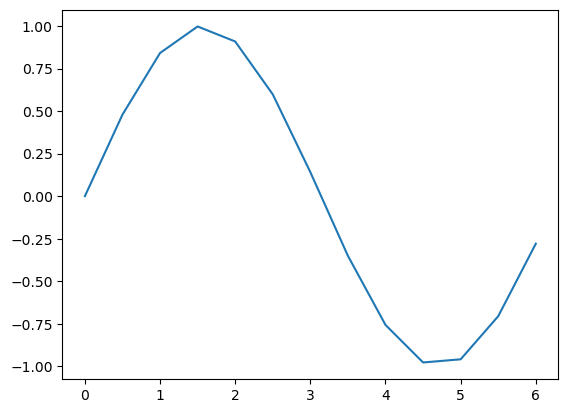

In [59]:
# at it's absolute simplest, to quickly have a look at some data
plt.plot(x, y)

We could easily add to this plot with more `plt` calls, however, we're going to learn a higher-level, more useful way to create plots and add elements.

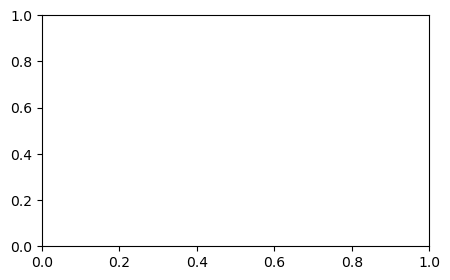

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

This `plt.subplots()` function created a blank figure (`fig`) and axis (`ax`) object with a single subplot (one row and one column, note the **keyword arguments** in `subplots()`). We also set a figure size, which in python is given by default in inches (5 inches wide by 3 inches tall). We could make more subplots also (and increase the figure size):

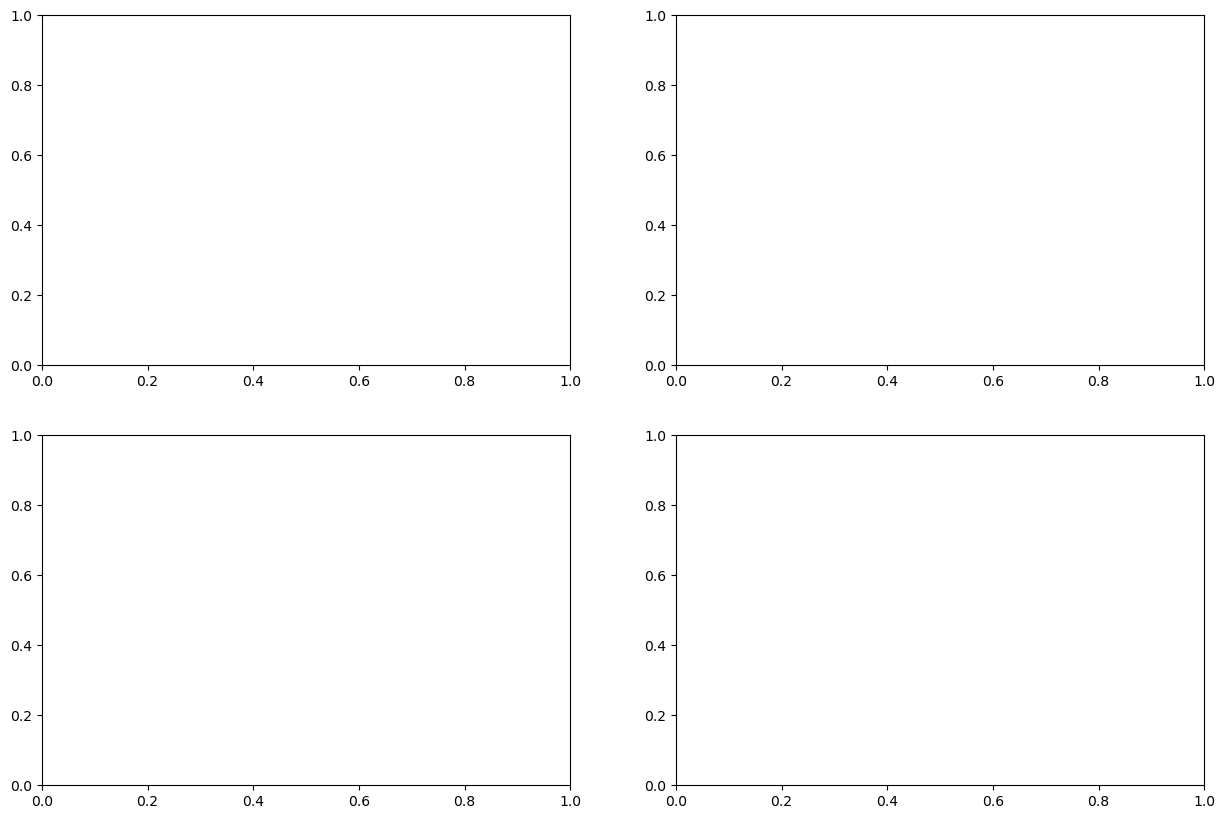

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

Here the `axes` array object now contains four objects, one for each axis. The shape of the `axes` array matches the shape of the subplots, so `axes[0, 0]` is the top left and `axes[1, 1]` is the bottom right

For now, we just need one subplot though, so let's go back to our first example and plot the data

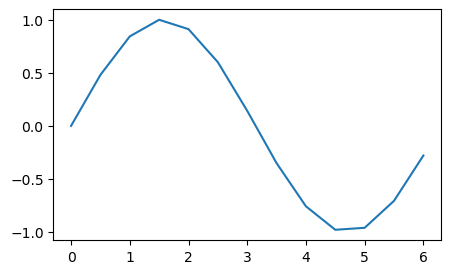

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
ax.plot(x, y)

We can see this created a line plot, but what if we wanted to see the data points?

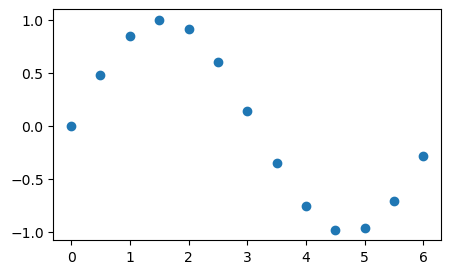

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
ax.scatter(x, y)

So now we've seen two **types of plots**: a **line plot** and a **scatter plot**. There are too many plot types to name (see some good examples [here](https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html)), so let's leave it at that for now and make the figure look nice with a few more commands.

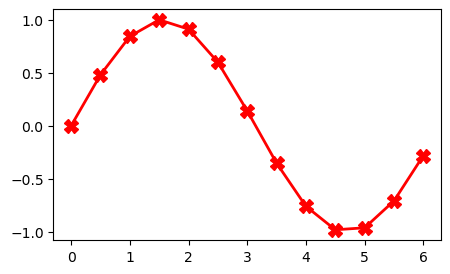

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

# the plot command takes many keyword arguments, let's use a few
ax.plot(x, y, marker='X', color='r', linewidth=2, markersize=10)

Now let's add the elements that **every plot you make should have**: axis labels!

Text(0.5, 0, 'x')

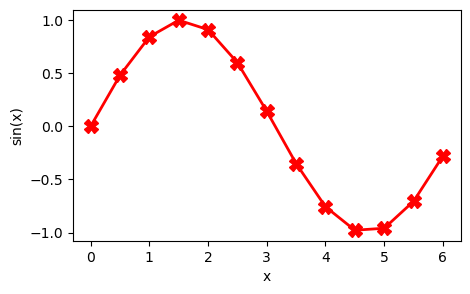

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

# the plot command takes many keyword arguments, let's use a few
ax.plot(x, y, marker='X', color='r', linewidth=2, markersize=10)

# label the axes
ax.set_ylabel('sin(x)')
ax.set_xlabel('x')

Let's also calculate the $\cos(x)$ and plot that in a different color and marker

Text(0.5, 0, 'x')

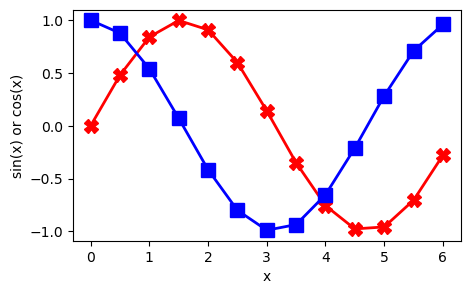

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

# the plot command takes many keyword arguments, let's use a few
ax.plot(x, y, marker='X', color='r', linewidth=2, markersize=10)
ax.plot(x, np.cos(x), marker='s', color='b', linewidth=2, markersize=10)

# label the axes
ax.set_ylabel('sin(x) or cos(x)')
ax.set_xlabel('x')

But which line is which!? If you are plotting more than one thing make sure you include a **legend**

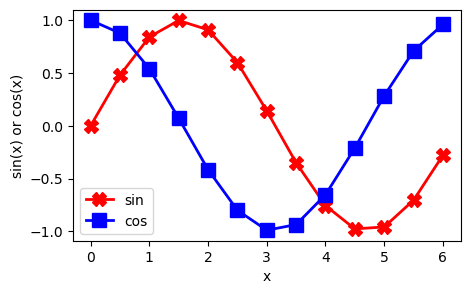

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

# the plot command takes many keyword arguments, let's use a few
# here we add the 'label' keyword argument, which will be used in
# the legend call below!
ax.plot(x, y, marker='X', color='r', linewidth=2, 
        markersize=10, label='sin')

ax.plot(x, np.cos(x), marker='s', color='b', linewidth=2, 
        markersize=10, label='cos')

# label the axes
ax.set_ylabel('sin(x) or cos(x)')
ax.set_xlabel('x')

# add a legend - NOTE we added the 'label' keyword to the two plot calls also
ax.legend()

Last, but certainly not least, let's save out our plot to a new directory called `figures`

In [68]:
# create a new directory that we'll use throughout the course
if not os.path.exists('figures/'):
    os.mkdir('figures/')

> **Note** our use of a conditional statement to check whether the figures directory already exists using `os.path.exists(directory_name)`, which returns a boolean True if it does.

When it's time to output a figure I add the `constrained_layout=True` argument below. It's fairly new in python and really useful for eliminating white space around the figure. We also added a grid and zero line for reference, and a title for good measure. 

**Pretty plots are important.** The better you present your data, often the more convincing your argument. Plus you look more professional when you make nice looking figures.

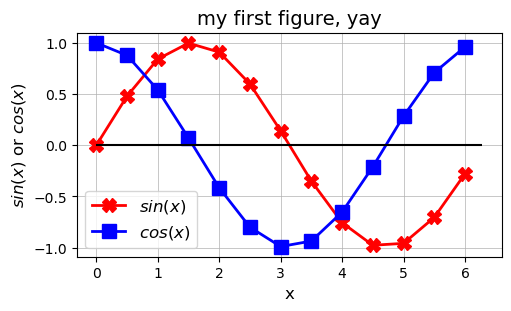

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3),
                      constrained_layout=True)

# the plot command takes many keyword arguments, let's use a few
ax.plot(x, y, marker='X', color='r', linewidth=2, 
        markersize=10, label='$sin(x)$')

ax.plot(x, np.cos(x), marker='s', color='b', linewidth=2, 
        markersize=10, label='$cos(x)$')

# label the axes
ax.set_ylabel('$sin(x)$ or $cos(x)$', fontsize=12)
ax.set_xlabel('x', fontsize=12)

# add a legend
ax.legend(fontsize=12)

# let's also add a grid and zero line for reference
ax.grid(lw=0.5)
ax.hlines(0, xmin=0, xmax=2*np.pi, color='k')

# we'll also add a title
ax.set_title('my first figure, yay', fontsize=14)

# save the figure at two resolutions
plt.savefig('figures/NB02_fig01_sin_cos.png')
plt.savefig('figures/NB02_fig01_sin_cos-hi-res.png', dpi=600)

<div class="alert alert-block alert-warning">
<b>Task 2.7</b>


Define 20 x values over the range 1-10. Calculate two y-variables: the exponential of x ($e^x$) and the natural log of x ($ln(x)$). Create a two panel figure (two subplots: one row, two columns). In the left plot, show a connected scatter with _black circle_ symbols and lines of $e^x$. Use the [`semilogy()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.semilogy.html) plotting function. On the right plot, show a connected scatter with _gray plus_ symbols and lines of $ln(x)$ with linear (_not log_) x and y scales. BOTH subplots should contain:

* title
* axis labels
* grid lines
* legends with appropriate labels
    
Save the plot in the `figures` subdirectory with the name `NB02_fig02_exp_ln` as a `.png` with a resolution of 300 DPI AND save the figure with the same name but as a `.pdf` with a resolution of 150 DPI (see [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)).
</div>

> **Note:** .pdf files are [vector graphics](https://en.wikipedia.org/wiki/Vector_graphics), which can draw smooth lines, whereas .png files are [raster graphics](https://en.wikipedia.org/wiki/Raster_graphics), which can only draw lines by pixel approximation.

## Plotting images with matplotlib

In [77]:
x = np.arange(0., 2 * np.pi, 0.1)
y = np.arange(0., 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)


In [78]:
X

array([[0. , 0.1, 0.2, ..., 6. , 6.1, 6.2],
       [0. , 0.1, 0.2, ..., 6. , 6.1, 6.2],
       [0. , 0.1, 0.2, ..., 6. , 6.1, 6.2],
       ...,
       [0. , 0.1, 0.2, ..., 6. , 6.1, 6.2],
       [0. , 0.1, 0.2, ..., 6. , 6.1, 6.2],
       [0. , 0.1, 0.2, ..., 6. , 6.1, 6.2]], shape=(63, 63))

In [79]:
Z = np.sin(X) + np.cos(Y)

In [80]:
Z

array([[1.        , 1.09983342, 1.19866933, ..., 0.7205845 , 0.8178375 ,
        0.9169106 ],
       [0.99500417, 1.09483758, 1.1936735 , ..., 0.71558867, 0.81284166,
        0.91191476],
       [0.98006658, 1.07989999, 1.17873591, ..., 0.70065108, 0.79790407,
        0.89697718],
       ...,
       [0.96017029, 1.0600037 , 1.15883962, ..., 0.68075479, 0.77800778,
        0.87708088],
       [0.98326844, 1.08310186, 1.18193777, ..., 0.70385294, 0.80110593,
        0.90017904],
       [0.9965421 , 1.09637551, 1.19521143, ..., 0.7171266 , 0.81437959,
        0.91345269]], shape=(63, 63))

(<matplotlib.image.AxesImage at 0x700a95f87c50>,
 <matplotlib.colorbar.Colorbar at 0x700a95f484a0>)

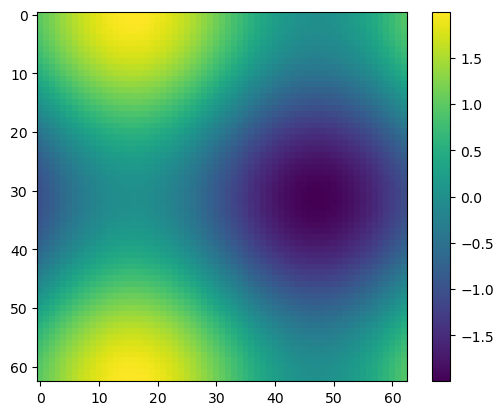

In [82]:
plt.imshow(Z), plt.colorbar()

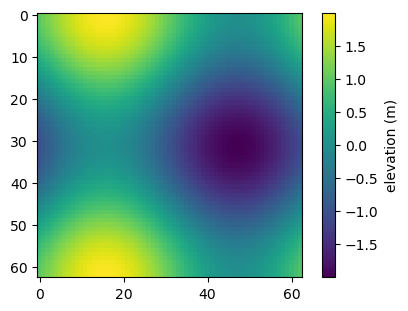

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3),
                      constrained_layout=True)

# the plot command takes many keyword arguments, let's use a few
im0 = ax.imshow(Z)
h = plt.colorbar(im0, ax=ax)
h.set_label('elevation (m)')
